# Problem Statemtent

* Suggest the tags based on the content that was there in the question posted on Stackoverflow.

# Real World / Business Objectives and Constraints
* Predict as many tags as possible with high precision and recall.
* Incorrect tags could impact customer experience on StackOverflow.
* No strict latency constraints.

# Performance metric
* Micro-Averaged F1-Score (Mean F Score) : The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

* In the multi-class and multi-label case, this is the weighted average of the F1 score of each class.

'Micro f1 score':
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.

'Macro f1 score':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* Hamming loss : The Hamming loss is the fraction of labels that are incorrectly predicted.

# Type of Machine Learning Problem
* It is a multi-label classification problem
* Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-file-stp-1/cleaned_data-1.pkl
/kaggle/input/cleaned-file-stp/cleaned_data.pkl
/kaggle/input/facebook-recruiting-iii-keyword-extraction/Test.zip
/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip
/kaggle/input/facebook-recruiting-iii-keyword-extraction/SampleSubmission.csv


In [3]:
# Importing Required Libraries
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset

In [5]:
# Reading Dataset
train = pd.read_csv("/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip")

* Commented code is Working but not model is not trained by kaggle due to computing power..!! 
* Move Down for Working Code.

In [ ]:
# train.shape

In [ ]:
# train.isnull().sum()

In [ ]:
# train.drop_duplicates('Title', inplace = True)
# train.shape

In [ ]:
# train.dropna(inplace = True)

In [ ]:
# train.isnull().sum()

In [ ]:
# train['Tag_Count'] = train['Tags'].apply(lambda x: len(str(x).split()))

In [ ]:
# train['Tag_Count'].value_counts()

In [ ]:
# fig = plt.figure(figsize = [10, 7])
# sns.countplot(train['Tag_Count'])
# plt.title('Distribution of tag count')
# plt.ylabel('Frequency')
# plt.xlabel('Tag count')
# plt.show()

In [ ]:
# cvect = CountVectorizer(tokenizer = lambda x: str(x).split())
# X = cvect.fit_transform(train['Tags'])
# X

In [ ]:
# X.shape

In [ ]:
# tag_names = cvect.get_feature_names()
# print(len(tag_names), tag_names[:10])

In [ ]:
# tag_freq = X.sum(axis = 0)
# type(tag_freq), tag_freq.A1.shape

In [ ]:
# print(tag_freq)

In [ ]:
# tag_freq_df = pd.Series(tag_freq.A1, index = tag_names)
# tag_freq_df.sort_values(ascending = False, inplace = True)
# tag_freq_df.head()

In [ ]:
# # plot distribution of tag frequency
# fig = plt.figure(figsize=[10,7])
# plt.plot(tag_freq_df.values,
#          c = sns.xkcd_rgb['greenish cyan'])
# plt.title('Tag frequency distribution')
# plt.ylabel('Frequency')
# plt.xlabel('Tag ID')
# plt.show()

In [ ]:
# # plot distribution of tag frequency
# fig = plt.figure(figsize=[10,7])
# plt.plot(tag_freq_df.iloc[:1000].values,
#          c = sns.xkcd_rgb['greenish cyan'])
# plt.title('Tag frequency distribution for first 1k values')
# plt.ylabel('Frequency')
# plt.xlabel('Tag ID')
# plt.show()

In [ ]:
# # plot distribution of tag frequency
# fig = plt.figure(figsize=[10,7])
# plt.plot(tag_freq_df.iloc[:500].values,
#          c = sns.xkcd_rgb['greenish cyan'])
# plt.title('Tag frequency distribution for first 500 values')
# plt.ylabel('Frequency')
# plt.xlabel('Tag ID')
# plt.show()

In [ ]:
# fig = plt.figure(figsize = [14,7])

# plt.plot(tag_freq_df.iloc[:100].values,
#          c = sns.xkcd_rgb['greenish cyan'])
# plt.scatter(x = list(range(0,100,5)), y = tag_freq_df.iloc[0:100:5], c = 'orange', label = "quantiles with 0.05 intervals")

# # quantiles with 0.25 difference
# plt.scatter(x = list(range(0,100,25)), y = tag_freq_df.iloc[0:100:25], c = 'm', label = "quantiles with 0.25 intervals")

# for x,y in zip(list(range(0,100,25)), tag_freq_df.iloc[0:100:25]):
#     plt.annotate(s = "({} , {})".format(x,y), xy = (x,y))

# plt.title('first 100 tags: Distribution of number of times tag appeared questions')
# plt.grid()
# plt.xlabel("Tag number")
# plt.ylabel("Number of times tag appeared")
# plt.legend()
# plt.show()

In [ ]:
# tag_freq_df.index.name = 'Tag'
# tag_freq_df = tag_freq_df.reset_index(name = 'Counts')
# tag_freq_df.head()

In [ ]:
# # Store tags greater than 10K in one list
# lst_tags_gt_10k = tag_freq_df[tag_freq_df.Counts>10000].Tag

# #Print the length of the list
# print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))

# # Store tags greater than 100K in one list
# lst_tags_gt_100k = tag_freq_df[tag_freq_df.Counts>100000].Tag

# #Print the length of the list.
# print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

In [ ]:
# data = dict(dict(zip(tag_freq_df.Tag, tag_freq_df.Counts)).items())
# wordcloud = WordCloud(    background_color='black',
#                           width=1600,
#                           height=800,
#                     ).generate_from_frequencies(data)

# fig = plt.figure(figsize=(30,20))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.tight_layout(pad=0)
# fig.savefig("tag.png")
# plt.show()

In [ ]:
# # Plot top 30 tags
# fig = plt.figure(figsize=[20,10])
# sns.barplot(x = tag_freq_df.iloc[:50].Tag,
#             y = tag_freq_df.iloc[:50].Counts,
#            color = sns.xkcd_rgb['greenish cyan'])
# plt.title('Frequency of top 50 Tags')
# plt.xlabel('Tags')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.show()

**Data Preprocessing**

In [ ]:
# stopwords_list = set(stopwords.words('english'))
# stemmer = SnowballStemmer("english")

# def cleanhtml(data):
#     data = data.lower()
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, ' ', str(data))
#     return cleantext

# def cleanpunc(sentence):
#     pattern = re.compile('[^A-Za-z]+')
#     sentence = re.sub(pattern, ' ', sentence)
#     return sentence

In [ ]:
# %%time

# postWithCode = 0
# lenPreProcessed = 0
# lenPostProcessed = 0
# questionProcessed = 0
# final_data = []
# for index, (row) in tqdm(enumerate(train[:1000000].itertuples())):
#     is_code = 0
    
#     title = row.Title
#     body = row.Body
#     tags = row.Tags
    
#     if '<code>' in body:
#         postWithCode += 1
#         is_code = 1
#     x = len(body) + len(title)
#     lenPreProcessed += x
    
#     code = str(re.findall(r'<code>(.*?)</code>', body, flags = re.DOTALL))
#     cleaned_body = re.sub('<code>(.*?)</code>', '', body, flags=re.MULTILINE|re.DOTALL) 
    
#     CompleteText = str(title) + ' ' + str(cleaned_body)
    
#     CompleteText_ch = cleanhtml(CompleteText)
#     CompleteText_cp = cleanpunc(CompleteText_ch)
#     word_list = word_tokenize(CompleteText_cp)
    
#     text = ' '.join(str(stemmer.stem(word)) for word in word_list if word not in stopwords_list and (len(word) != 1 \
#                                                                                                      or word == 'c'))
    
#     lenPostProcessed += len(text)
#     tup = (text, code, tags, x, len(text), is_code)    
#     final_data.append(tup)

#     questionProcessed += 1
#     if questionProcessed%100000 == 0:
#         print("number of questions completed = ",questionProcessed)

# avglenPreProcessed = (lenPreProcessed*1.0)/questionProcessed
# avglenPostProcessed = (lenPostProcessed*1.0)/questionProcessed

# print( "Avg. length of questions(Title+Body) before processing: %d"%avglenPreProcessed)
# print( "Avg. length of questions(Title+Body) after processing: %d"%avglenPostProcessed)
# print ("Percent of questions containing code: %d"%((postWithCode*100.0)/questionProcessed))

In [ ]:
# df = pd.DataFrame(final_data, columns=["Text", "code", "tags", "lenPreprocessed", "lenPostprocessed", "iscode"])

In [ ]:
# df.to_pickle("cleaned_data.pkl")

In [ ]:
# df1 = pd.read_pickle("/kaggle/input/cleaned-file-stp/cleaned_data.pkl")

In [ ]:
# df1.head()

In [ ]:
# df1.shape

In [ ]:
# df1.drop(['code', 'lenPostprocessed', 'lenPreprocessed', 'iscode'], axis = 1, inplace = True)

**Machine Learning Models**

Converting Tags For Multilabel Problem

In [ ]:
# vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary ='true')
# multilabel_y = vectorizer.fit_transform(df1['tags'])

In [ ]:
# def tags_to_choose(n):
#     t = multilabel_y.sum(axis = 0).tolist()[0]
#     sorted_tags_i = sorted(range(len(t)), key = lambda i: t[i], reverse = True)
#     multilabel_yn = multilabel_y[:, sorted_tags_i[:n]]
#     return multilabel_yn

In [ ]:
# def question_explained_fn(n):
#     multilabel_yn = tags_to_choose(n)
#     x = multilabel_yn.sum(axis = 1)
#     return (np.count_nonzero(x == 0))

In [ ]:
# question_explained = []
# total_tags = multilabel_y.shape[1]
# total_ques = df1.shape[0]
# for i in range(500, total_tags, 100):
#     question_explained.append(np.round(((total_ques - question_explained_fn(i))/ total_ques)*100, 3))

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(question_explained)
# xlabel = list(500 + np.array(range(-50,450,50))*50)
# ax.set_xticklabels(xlabel)
# plt.xlabel("Number of tags")
# plt.ylabel("percentage of Questions coverd partially")
# plt.grid()
# plt.show()
# # you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
# print("with ",5500,"tags we are covering ",question_explained[50],"% of questions")

In [ ]:
# multilabel_yx = tags_to_choose(5500)
# print("number of questions that are not covered :", question_explained_fn(5500),"out of ", total_ques)

In [ ]:
# print("Number of tags in sample :", multilabel_y.shape[1])
# print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

We consider top 15% tags which covers 99% of the questions

In [ ]:
# Splitting Data into train and test
# total_size = df1.shape[0]
# train_size = int(0.80*total_size)

# x_train = df1.head(train_size)
# x_test = df1.tail(total_size - train_size)

# y_train = multilabel_yx[0 : train_size,:]
# y_test = multilabel_yx[train_size : total_size,:]

In [ ]:
# print("Number of data points in train data :", y_train.shape)
# print("Number of data points in test data :", y_test.shape)

Featurizing Data

In [ ]:
# vectorizer = TfidfVectorizer(min_df = 0.00009, max_features = 200000, smooth_idf = True, norm = "l2", \
#                              tokenizer = lambda x: x.split(), sublinear_tf = False, ngram_range = (1,3))
# x_train_multilabel = vectorizer.fit_transform(x_train['Text'])
# x_test_multilabel = vectorizer.transform(x_test['Text'])

In [ ]:
# print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
# print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

SGD Classifier with OnevsRest Classifier

In [ ]:
# classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
# classifier.fit(x_train_multilabel, y_train)
# predictions = classifier.predict(x_test_multilabel)

# print("accuracy :",metrics.accuracy_score(y_test,predictions))
# print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
# print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
# print("hamming loss :",metrics.hamming_loss(y_test,predictions))
# print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

* The Above Code has taken title with Body also and could not be trained due to limited resource.
* Kaggle kernels doesn't have sufficient memory to train 5000 (tags to predict) models
* If you guys have good machine you can try to train 5000 models on it and check their performance
* you can also try other models like logistic regression, SVM etc.
* i am going for first 100 tags.

Using Text as Title only...

In [6]:
train.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [7]:
train.shape

(6034195, 4)

In [8]:
train.drop_duplicates(['Title'], inplace = True)

In [9]:
train.shape

(4125233, 4)

In [10]:
train['Tag_Count'] = train['Tags'].apply(lambda x : len(str(x).split()))

In [11]:
train.dropna(inplace = True)
train.shape

(4125226, 5)

In [12]:
train.isnull().sum()

Id           0
Title        0
Body         0
Tags         0
Tag_Count    0
dtype: int64

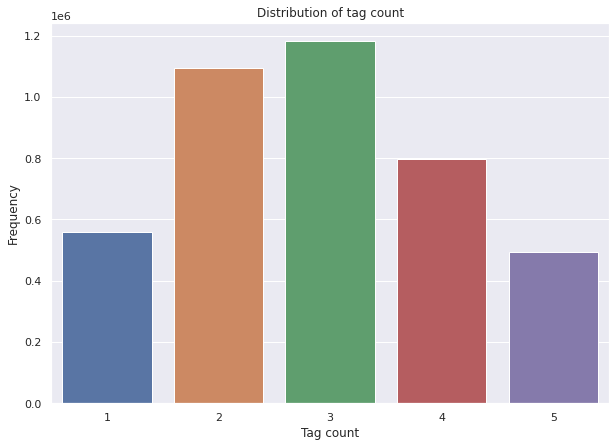

In [13]:
# plot distribution of tag count
fig = plt.figure(figsize=[10,7])
sns.countplot(train['Tag_Count'])
plt.title('Distribution of tag count')
plt.ylabel('Frequency')
plt.xlabel('Tag count')
plt.show()

In [14]:
tag_vectorizer = CountVectorizer(tokenizer = lambda x : str(x).split())
tag_mat = tag_vectorizer.fit_transform(train['Tags'])

In [15]:
tag_mat.shape

(4125226, 41573)

In [16]:
tag_names = tag_vectorizer.get_feature_names()
len(tag_names)

41573

In [17]:
tag_freq = tag_mat.sum(axis = 0)
tag_freq.A1.shape

(41573,)

In [18]:
tag_freq_ser = pd.Series(tag_freq.A1, index = tag_names)
tag_freq_ser.sort_values(ascending  = False, inplace = True)
tag_freq_ser.head()

c#            327236
java          294484
php           277911
javascript    262336
android       232395
dtype: int64

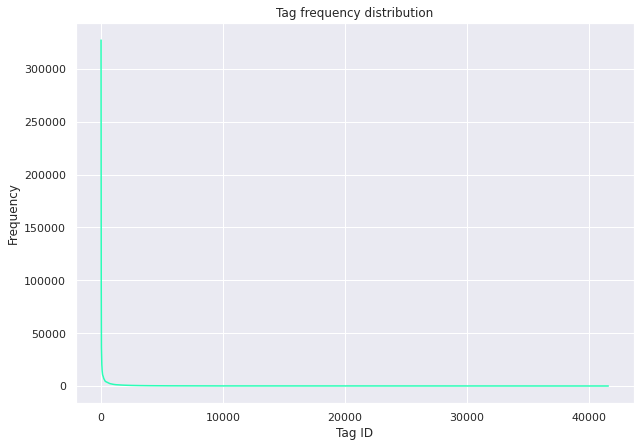

In [19]:
# plot distribution of tag frequency
fig = plt.figure(figsize=[10,7])
plt.plot(tag_freq_ser.values,
         c=sns.xkcd_rgb['greenish cyan'])
plt.title('Tag frequency distribution')
plt.ylabel('Frequency')
plt.xlabel('Tag ID')
plt.show()

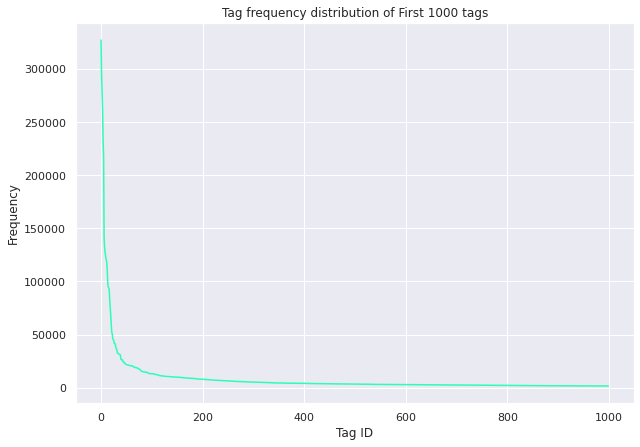

In [20]:
# plot distribution of tag frequency
fig = plt.figure(figsize=[10,7])
plt.plot(tag_freq_ser[:1000].values,
         c=sns.xkcd_rgb['greenish cyan'])
plt.title('Tag frequency distribution of First 1000 tags')
plt.ylabel('Frequency')
plt.xlabel('Tag ID')
plt.show()

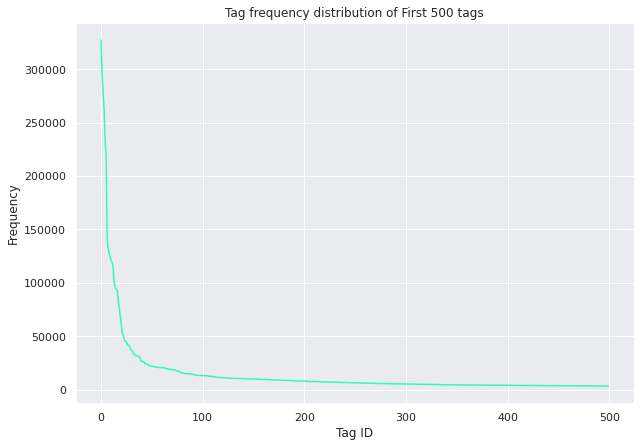

In [21]:
# plot distribution of tag frequency
fig = plt.figure(figsize=[10,7])
plt.plot(tag_freq_ser[:500].values,
         c=sns.xkcd_rgb['greenish cyan'])
plt.title('Tag frequency distribution of First 500 tags')
plt.ylabel('Frequency')
plt.xlabel('Tag ID')
plt.show()

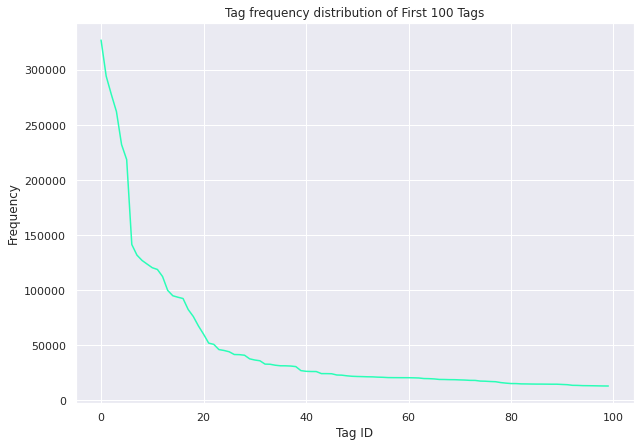

In [22]:
# plot distribution of tag frequency for Top 100 Tags
fig = plt.figure(figsize=[10,7])
plt.plot(tag_freq_ser[:100].values,
         c=sns.xkcd_rgb['greenish cyan'])
plt.title('Tag frequency distribution of First 100 Tags')
plt.ylabel('Frequency')
plt.xlabel('Tag ID')
plt.show()

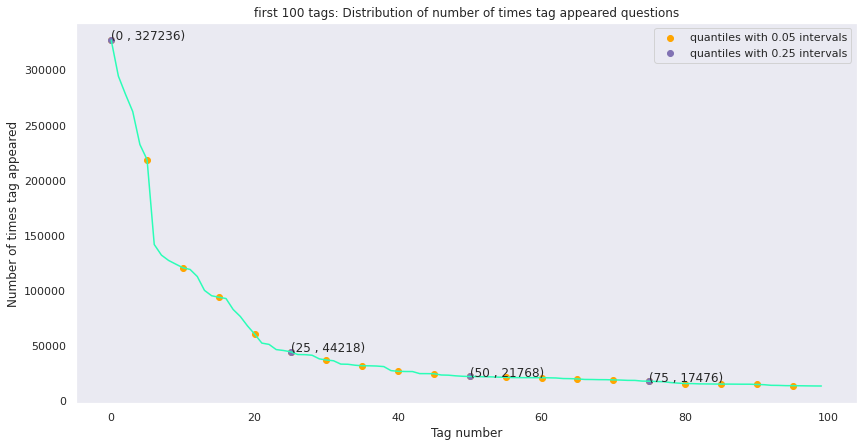

In [23]:
# plot distribution of tag frequency for Top 100 Tags
fig = plt.figure(figsize = [14,7])

plt.plot(tag_freq_ser.iloc[:100].values,
         c = sns.xkcd_rgb['greenish cyan'])
plt.scatter(x = list(range(0,100,5)), y = tag_freq_ser.iloc[0:100:5], c = 'orange', label = "quantiles with 0.05 intervals")

# quantiles with 0.25 difference
plt.scatter(x = list(range(0,100,25)), y = tag_freq_ser.iloc[0:100:25], c = 'm', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_freq_ser.iloc[0:100:25]):
    plt.annotate(s = "({} , {})".format(x,y), xy = (x,y))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

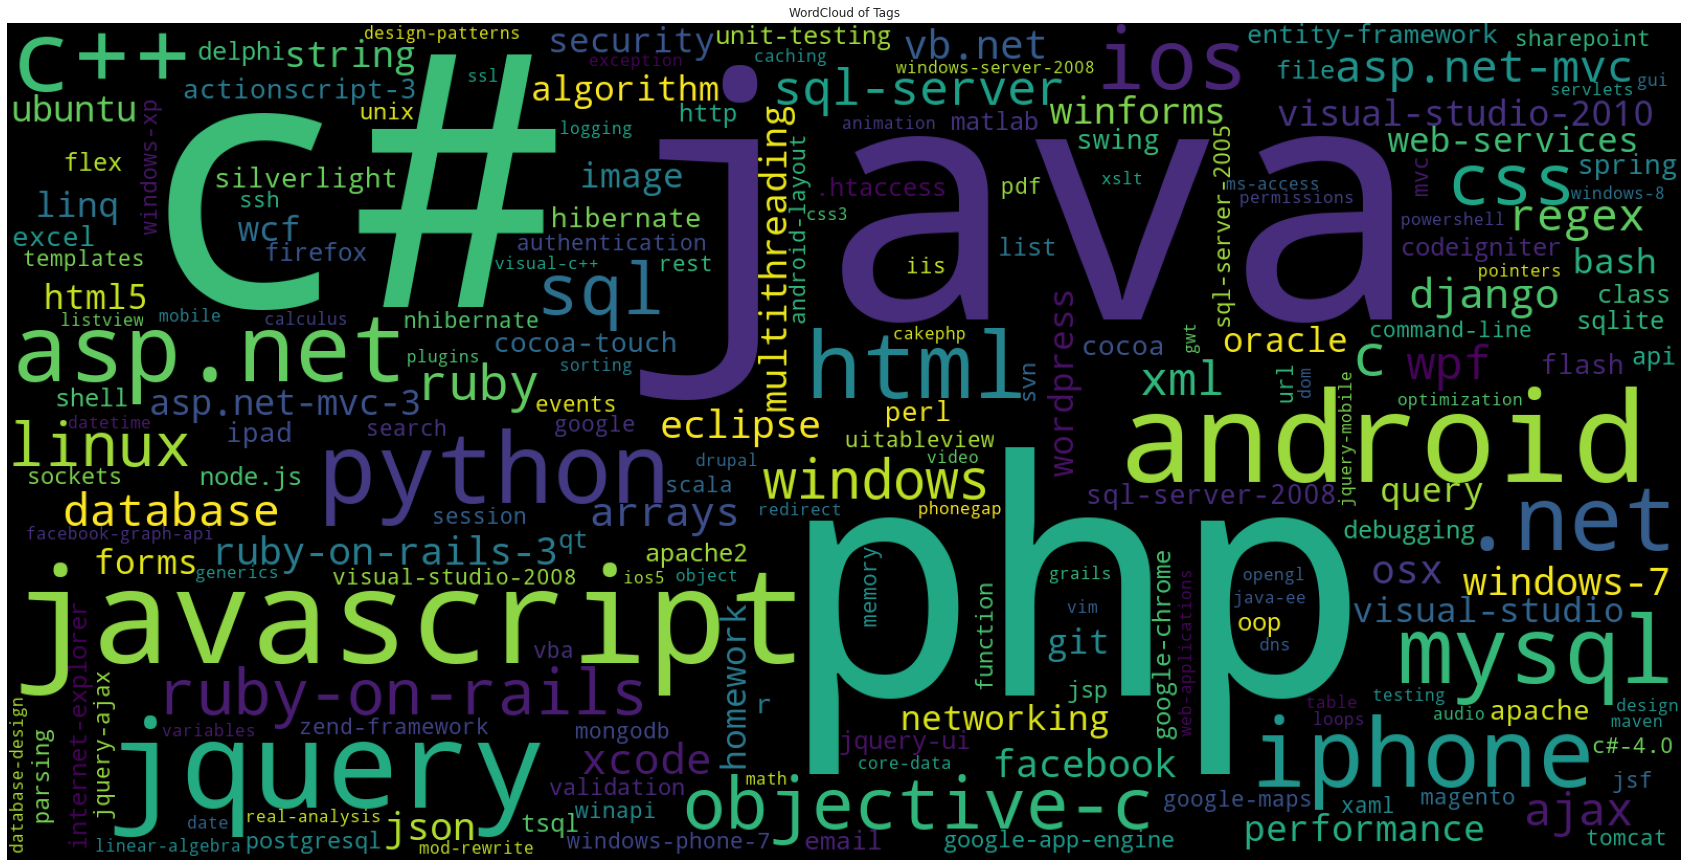

In [24]:
# plot word count for tags
wordcloud = WordCloud(background_color='black', height = 800 , width = 1600,
                      max_words=200).generate_from_frequencies(tag_freq_ser)
fig = plt.figure(figsize=[30,20])
plt.title('WordCloud of Tags')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

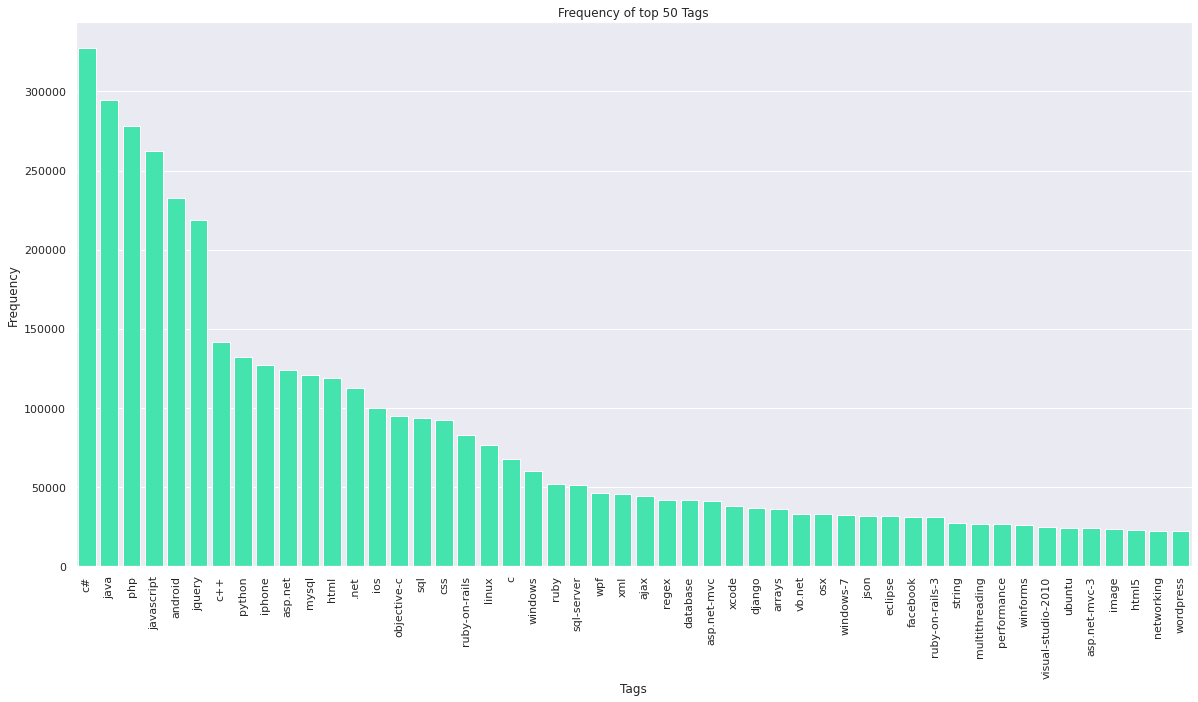

In [25]:
# Plot top 30 tags
fig = plt.figure(figsize=[20,10])
sns.barplot(x=tag_freq_ser.iloc[:50].index,
            y=tag_freq_ser.iloc[:50].values,
           color=sns.xkcd_rgb['greenish cyan'])
plt.title('Frequency of top 50 Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Data preprocessing**

In [ ]:
def clean_text(sentence):
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    # Tokenize
    word_list = word_tokenize(sentence)
    stopwords_list = set(stopwords.words('english'))
    text = ' '.join(str(stemmer.stem(word)) for word in word_list if word not in stopwords_list and (len(word) != 1 \
                                                                                                     or word == 'c'))    
    return text

# create tqdm for pandas
tqdm.pandas()
# clean text data
stemmer = SnowballStemmer("english")
train['Title'] = train['Title'].progress_apply(lambda x: clean_text(str(x)))

In [26]:
train.head()

,Id,Title,Body,Tags,Tag_Count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


In [27]:
train.drop(['Body'], axis = 1, inplace = True)

In [28]:
train.head()

,Id,Title,Tags,Tag_Count
0,1,How to check if an uploaded file is an image w...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,firefox,1
2,3,R Error Invalid type (list) for variable,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,c# url encoding,3
4,5,How to modify whois contact details?,php api file-get-contents,3


In [ ]:
# train.to_pickle("cleaned_data-1.pkl")

In [4]:
train = pd.read_pickle("/kaggle/input/cleaned-file-stp-1/cleaned_data-1.pkl")

# Machine Learning Models 

**Reduce Number of Tags**

In [5]:
tag_vectorizer = CountVectorizer(tokenizer = lambda x : str(x).split(), binary = True)
multinomial_y = tag_vectorizer.fit_transform(train['Tags'])

In [6]:
def tags_to_choose(n):
    t = multinomial_y.sum(axis = 0).tolist()[0]
    sorted_tags = sorted(range(len(t)), key = lambda i : t[i], reverse = True)
    multinomial_yn = multinomial_y[: , sorted_tags[:n]]
    return multinomial_yn

def questions_explained_fn(n):
    multinomial_yn = tags_to_choose(n)
    x = multinomial_yn.sum(axis = 1)
    return (np.count_nonzero(x == 0))

In [7]:
questions_explained = []
total_ques = multinomial_y.shape[0]
total_tags = multinomial_y.shape[1]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_ques - questions_explained_fn(i))/total_ques)*100,3))

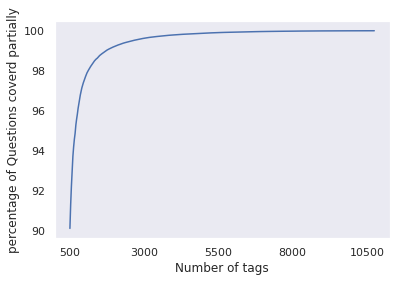

with  5500 tags we are covering  99.032 % of questions


In [8]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500 + np.array(range( -50, 450, 50)) * 50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("percentage of Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [9]:
# Taking First 100 top tags
multinomial_yx = tags_to_choose(100)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_ques)

number of questions that are not covered : 39947 out of  4125226


In [10]:
print("Number of tags in sample :", multinomial_y.shape[1])
print("number of tags taken :", multinomial_yx.shape[1],"(",(multinomial_yx.shape[1]/multinomial_y.shape[1])*100,"%)")

Number of tags in sample : 41573
number of tags taken : 100 ( 0.2405407355735694 %)


In [11]:
# print percent of question covered with number of tags
print('#Tags\t%Ques')
for idx in range(500, 7500, 500):
    print(idx, '\t', questions_explained[int(idx/100)])

#Tags	%Ques
500 	 94.185
1000 	 95.816
1500 	 96.961
2000 	 97.616
2500 	 98.028
3000 	 98.334
3500 	 98.569
4000 	 98.757
4500 	 98.906
5000 	 99.032
5500 	 99.131
6000 	 99.212
6500 	 99.288
7000 	 99.353


In [12]:
# Splitting train and test data
total_size = train.shape[0]
train_size = int(0.80*total_size)

x_train = train.head(train_size)
x_test = train.tail(total_size - train_size)

y_train = multinomial_yx[0:train_size,:]
y_test = multinomial_yx[train_size:total_size,:]

In [13]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (3300180, 100)
Number of data points in test data : (825046, 100)


Featurizing Data

In [14]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['Title'])
x_test_multilabel = vectorizer.transform(x_test['Title'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:02:27.879717


In [15]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (3300180, 7817) Y : (3300180, 100)
Dimensions of test data X: (825046, 7817) Y: (825046, 100)


# **Model training**

SGDClassifier one vs rest

In [16]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.37974973516628163
macro f1 score : 0.40256817715350107
micro f1 scoore : 0.47428483368885505
hamming loss : 0.009427401623667044
Precision recall report :
               precision    recall  f1-score   support

           0       0.62      0.18      0.28     67841
           1       0.83      0.39      0.53     61651
           2       0.88      0.46      0.61     57998
           3       0.79      0.35      0.49     55022
           4       0.94      0.65      0.76     49591
           5       0.88      0.56      0.68     45771
           6       0.69      0.25      0.37     29362
           7       0.90      0.56      0.69     27507
           8       0.71      0.35      0.47     25837
           9       0.82      0.35      0.49     25311
          10       0.89      0.54      0.67     24658
          11       0.55      0.15      0.24     25178
          12       0.59      0.10      0.17     22890
          13       0.65      0.24      0.35     21947
          14       0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* We had got pretty decent results only with 100 tags
* if you have more computing power try with more number of tags.